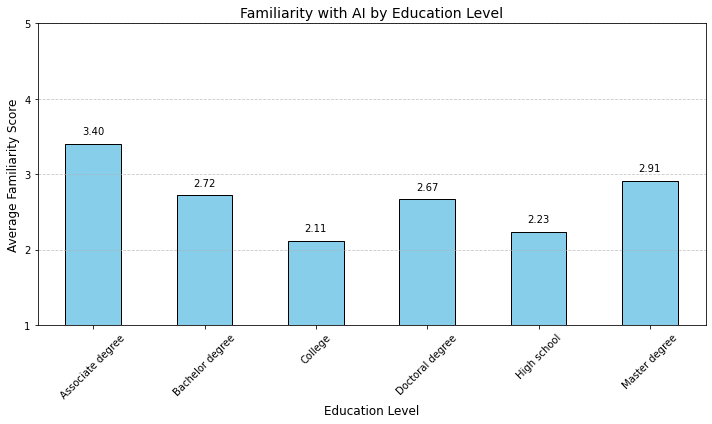

<Figure size 432x288 with 0 Axes>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Analysis Excel.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

# Renaming columns for clarity
columns_to_rename = {
    'C001': 'Familiarity with AI',
    'F003': 'Education Level',
    'F004': 'Employment Status'
}
data.rename(columns=columns_to_rename, inplace=True)

# Converting relevant columns to numeric where necessary
data[['Familiarity with AI']] = \
    data[['Familiarity with AI']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in 'Education Level' and 'Employment Status'
data = data.dropna(subset=['Education Level', 'Employment Status'])

# Define mappings for 'Education Level' and 'Employment Status'
education_mapping = {2: 'High school', 3: 'College', 4: 'Associate degree', 5: 'Bachelor degree', 6: 'Master degree', 7: 'Doctoral degree'}
employment_mapping = {1: 'Employed full-time', 2: 'Employed part-time', 3: 'Unemployed', 4: 'Student', 5: 'Retired', 6: 'Self-employed'}

# Apply mappings
data['Education Level'] = data['Education Level'].map(education_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_mapping)

# Graph 1: Familiarity with AI by Education Level
plt.figure(figsize=(10, 6))
education_familiarity = data.groupby('Education Level')['Familiarity with AI'].mean()
bars = education_familiarity.plot(kind='bar', color='skyblue', edgecolor='black')

# Add mean values on top of bars
for bar, mean in zip(bars.patches, education_familiarity.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{mean:.2f}',
             ha='center', va='bottom', fontsize=10)

# Add labels, title, and styling
plt.title('Familiarity with AI by Education Level', fontsize=14)
plt.ylabel('Average Familiarity Score', fontsize=12)
plt.ylim(1, 5)
plt.yticks(range(1, 6))
plt.xlabel('Education Level', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig("familiarity_education.png")

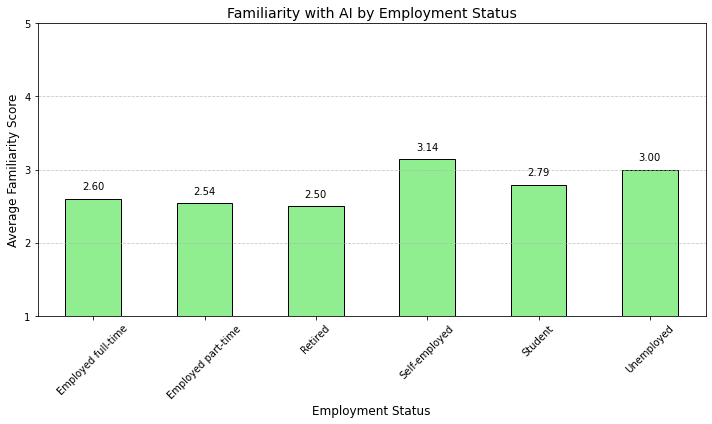

<Figure size 432x288 with 0 Axes>

In [14]:
# Graph 2: Familiarity with AI by Employment Status
plt.figure(figsize=(10, 6))
employment_familiarity = data.groupby('Employment Status')['Familiarity with AI'].mean()
bars = employment_familiarity.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add mean values on top of bars
for bar, mean in zip(bars.patches, employment_familiarity.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{mean:.2f}',
             ha='center', va='bottom', fontsize=10)

# Add labels, title, and styling
plt.title('Familiarity with AI by Employment Status', fontsize=14)
plt.ylabel('Average Familiarity Score', fontsize=12)
plt.ylim(1, 5)
plt.yticks(range(1, 6))
plt.xlabel('Employment Status', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
plt.savefig("familiarity_employment.png")

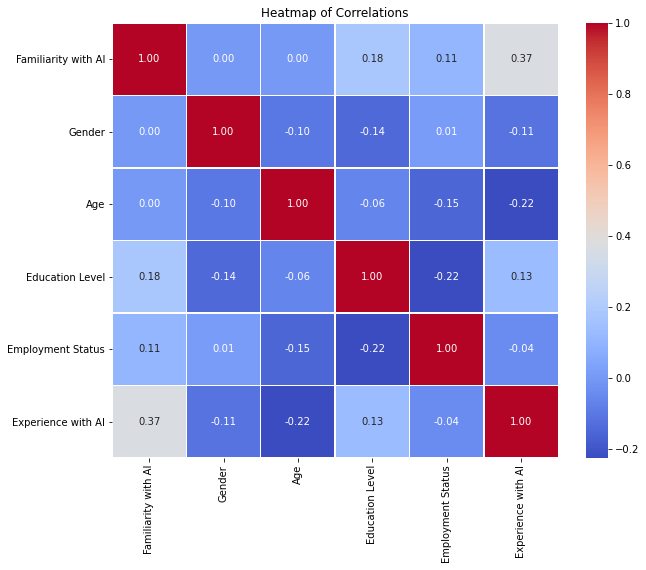

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Analysis Excel.xlsx'
data_df = pd.read_excel(file_path, sheet_name='data')

# Strip column names to remove extra spaces
data_df.columns = data_df.columns.str.strip()


# Rename columns for clarity
data_df = data_df.rename(columns={
    'C001': 'Familiarity with AI',
    'C010': 'Experience with AI',
    'F001': 'Age',
    'F002': 'Gender',
    'F003': 'Education Level',
    'F004': 'Employment Status'
  
})

# Define the two sets of columns
columns_set_1 = ['Familiarity with AI', 'Gender', 'Age']
columns_set_2 = [ 'Education Level', 'Employment Status','Experience with AI']

# Filter the DataFrame for the relevant columns
relevant_columns = columns_set_1 + columns_set_2
filtered_data = data_df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()

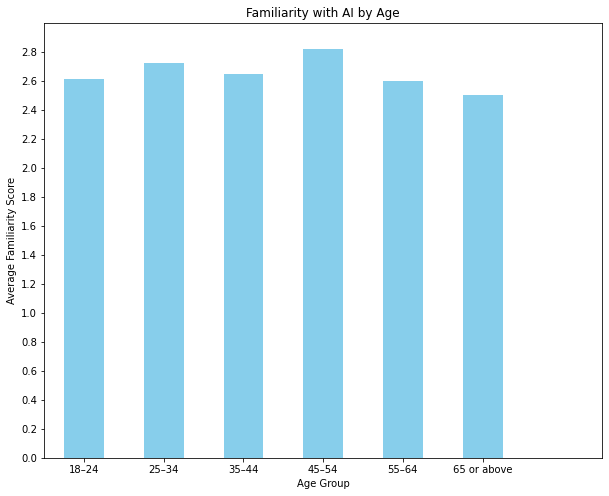

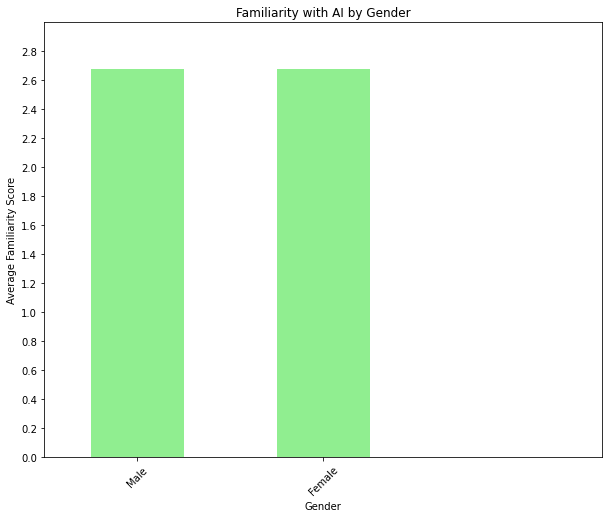

In [16]:
import numpy as np
# Renaming columns for clarity
columns_to_rename = {
    'C001': 'Familiarity with AI',
    'F001': 'Age',
    'F002': 'Gender'
}
data.rename(columns=columns_to_rename, inplace=True)

# Converting relevant columns to numeric where necessary
data[['Familiarity with AI']] = \
    data[['Familiarity with AI']].apply(pd.to_numeric, errors='coerce')

# Graph 1: Familiarity with AI by Age
age_group_familiarity = data.groupby('Age')['Familiarity with AI'].mean()
age_group_familiarity.plot(kind='bar', figsize=(10, 8), color='skyblue')
plt.title('Familiarity with AI by Age')
plt.xlabel('Age Group')
plt.ylabel('Average Familiarity Score')
plt.ylim(0, 3)
plt.yticks(np.arange(0, 3, 0.2))
plt.xticks([0,1,2,3,4,5], ['18–24','25–34','35–44','45–54','55–64', '65 or above'],rotation=0) 
plt.show()

# Graph 2: Familiarity with AI by Gender
gender_familiarity = data.groupby('Gender')['Familiarity with AI'].mean()
gender_familiarity.plot(kind='bar', figsize=(10, 8), color='lightgreen')
plt.title('Familiarity with AI by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Familiarity Score')
plt.ylim(0, 3)
plt.yticks(np.arange(0, 3, 0.2))
plt.xticks([0,1], ['Male', 'Female'],rotation=45) 
plt.show()

In [17]:
# Count of males and females
gender_counts = data['Gender'].value_counts()
print(gender_counts)

2         62
1         40
Gender     1
Name: Gender, dtype: int64


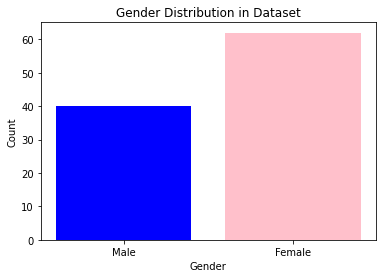

In [18]:
gender_counts = {'Male': 40, 'Female': 62}

# Create a bar chart for gender distribution
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.keys(), gender_counts.values(), color=['blue', 'pink'])
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [19]:
# Count of people by occupation
occupation_counts = data['Employment Status'].value_counts()
print(occupation_counts)

Employed full-time    35
Student               29
Employed part-time    26
Self-employed          7
Retired                4
Unemployed             1
Name: Employment Status, dtype: int64


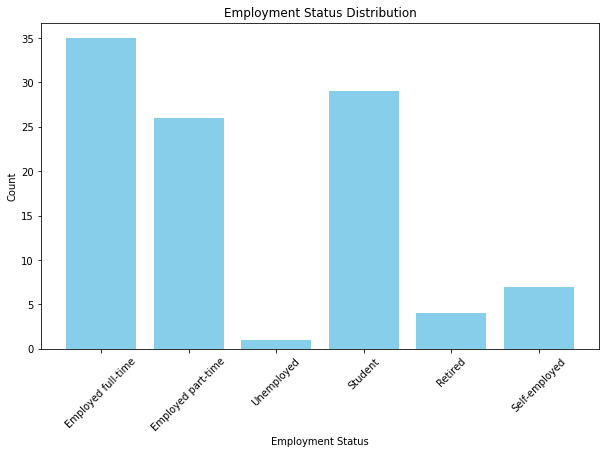

In [20]:
# Data for employment status counts
employment_status_counts = {
    1: 35,
    4: 29,
    2: 26,
    6: 7,
    5: 4,
    3: 1
}

# Map numerical codes to descriptions
employment_status_labels = {
    1: 'Employed full-time',
    2: 'Employed part-time',
    3: 'Unemployed',
    4: 'Student',
    5: 'Retired',
    6: 'Self-employed',

}

# Map labels to counts
labels = [employment_status_labels[i] for i in sorted(employment_status_counts.keys())]
counts = [employment_status_counts[i] for i in sorted(employment_status_counts.keys())]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


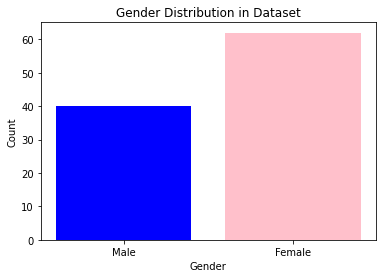

In [24]:
# Count of males and females
gender_counts = data['Gender'].value_counts()


gender_counts = {'Male': 40, 'Female': 62}

# Create a bar chart for gender distribution
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.keys(), gender_counts.values(), color=['blue', 'pink'])
plt.title('Gender Distribution in Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

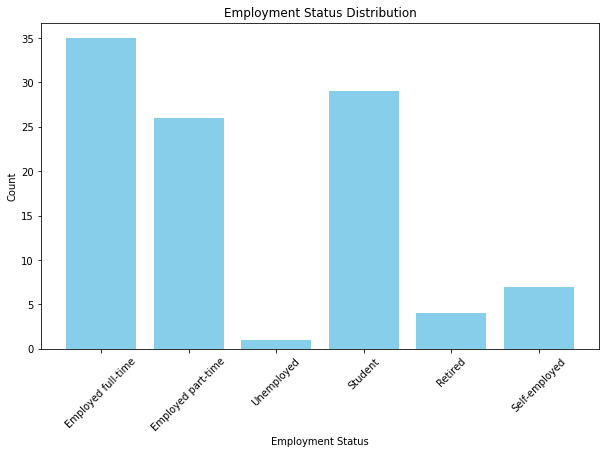

In [25]:
# Count of people by occupation
occupation_counts = data['Employment Status'].value_counts()

# Data for employment status counts
employment_status_counts = {
    1: 35,
    4: 29,
    2: 26,
    6: 7,
    5: 4,
    3: 1
}

# Map numerical codes to descriptions
employment_status_labels = {
    1: 'Employed full-time',
    2: 'Employed part-time',
    3: 'Unemployed',
    4: 'Student',
    5: 'Retired',
    6: 'Self-employed',

}

# Map labels to counts
labels = [employment_status_labels[i] for i in sorted(employment_status_counts.keys())]
counts = [employment_status_counts[i] for i in sorted(employment_status_counts.keys())]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




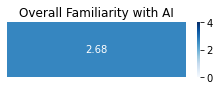

In [27]:
overall_familiarity = data['Familiarity with AI'].mean()

# Display the result
#The overall mean familiarity with AI is 2.68 ")

# Set up the data for the heatmap
heatmap_data = np.array([[2.68]])  # Using the previous overall familiarity score
max_value = 4  # Setting the maximum value for the color scale

# Create the heatmap
plt.figure(figsize=(4, 1))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Blues', cbar=True, vmin=0, vmax=max_value)
ax.set_title('Overall Familiarity with AI')
ax.axis('off')  # Hide the axes
plt.show()

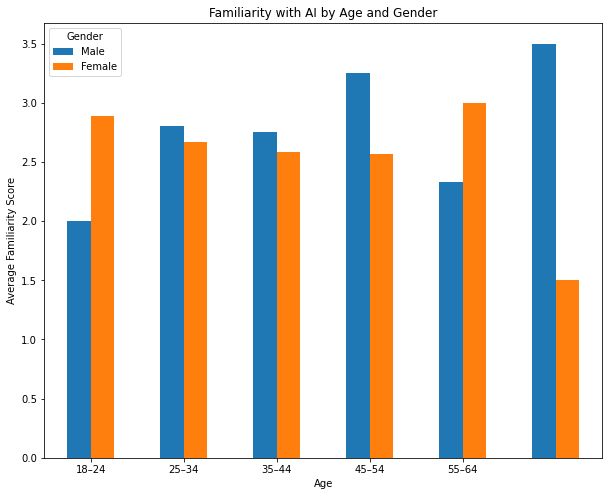

In [21]:
# Renaming columns for clarity
columns_to_rename = {
    'C001': 'Familiarity with AI',
    'C010': 'Experience with AI',
    'C009': 'Overall Trust in AI',
    'D001': 'AI public services comfort level',
    'F001': 'Age',
    'F002': 'Gender',
    'F003': 'Education Level',
    'F004': 'Employment Status',
    'F005': 'Residence in Austria'
}
data.rename(columns=columns_to_rename, inplace=True)

# Converting relevant columns to numeric where necessary
data[['Familiarity with AI', 'Experience with AI', 'Overall Trust in AI', 'AI public services comfort level']] = \
    data[['Familiarity with AI', 'Experience with AI', 'Overall Trust in AI', 'AI public services comfort level']].apply(pd.to_numeric, errors='coerce')


# Demographic analysis - familiarity with by Age and Gender
pivot_table = data.pivot_table(values='Familiarity with AI', index='Age', columns='Gender', aggfunc='mean')
pivot_table.plot(kind='bar', figsize=(10, 8))
plt.title('Familiarity with AI by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Familiarity Score')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks([0,1,2,3,4], ['18–24','25–34','35–44','45–54','55–64'], rotation=0)
plt.show()


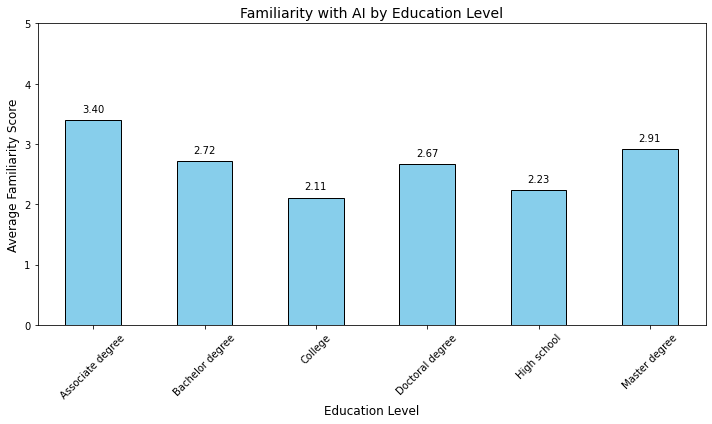

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Analysis Excel.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

# Renaming columns for clarity
columns_to_rename = {
    'C001': 'Familiarity with AI',
    'F003': 'Education Level',
    'F004': 'Employment Status'
}
data.rename(columns=columns_to_rename, inplace=True)

# Converting relevant columns to numeric where necessary
data[['Familiarity with AI']] = \
    data[['Familiarity with AI']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values in 'Education Level' and 'Employment Status'
data = data.dropna(subset=['Education Level', 'Employment Status'])

# Define mappings for 'Education Level' and 'Employment Status'
education_mapping = {2: 'High school', 3: 'College', 4: 'Associate degree', 5: 'Bachelor degree', 6: 'Master degree', 7: 'Doctoral degree'}
employment_mapping = {1: 'Employed full-time', 2: 'Employed part-time', 3: 'Unemployed', 4: 'Student', 5: 'Retired', 6: 'Self-employed'}

# Apply mappings
data['Education Level'] = data['Education Level'].map(education_mapping)
data['Employment Status'] = data['Employment Status'].map(employment_mapping)

# Graph 1: Familiarity with AI by Education Level
plt.figure(figsize=(10, 6))
education_familiarity = data.groupby('Education Level')['Familiarity with AI'].mean()
bars = education_familiarity.plot(kind='bar', color='skyblue', edgecolor='black')

# Add mean values on top of bars
for bar, mean in zip(bars.patches, education_familiarity.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{mean:.2f}',
             ha='center', va='bottom', fontsize=10)

# Add labels, title, and styling
plt.title('Familiarity with AI by Education Level', fontsize=14)
plt.ylabel('Average Familiarity Score', fontsize=12)
plt.ylim(0, 5)
plt.yticks(range(0, 6))
plt.xlabel('Education Level', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()




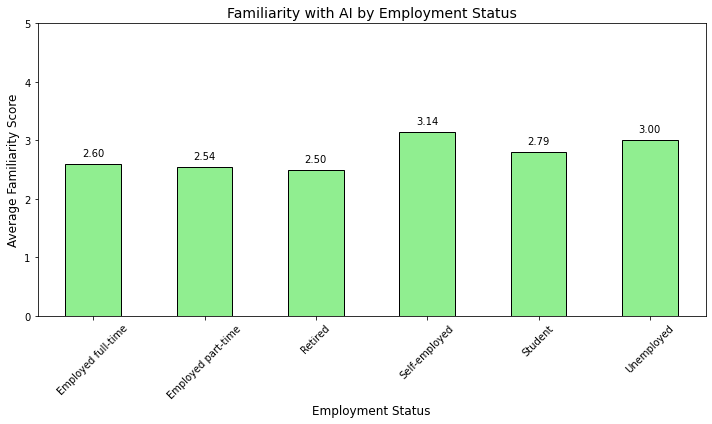

<Figure size 432x288 with 0 Axes>

In [30]:
# Graph 2: Familiarity with AI by Employment Status
plt.figure(figsize=(10, 6))
employment_familiarity = data.groupby('Employment Status')['Familiarity with AI'].mean()
bars = employment_familiarity.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add mean values on top of bars
for bar, mean in zip(bars.patches, employment_familiarity.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{mean:.2f}',
             ha='center', va='bottom', fontsize=10)

# Add labels, title, and styling
plt.title('Familiarity with AI by Employment Status', fontsize=14)
plt.ylabel('Average Familiarity Score', fontsize=12)
plt.ylim(0, 5)
plt.yticks(range(0, 6))
plt.xlabel('Employment Status', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("familiarity_employment.png")

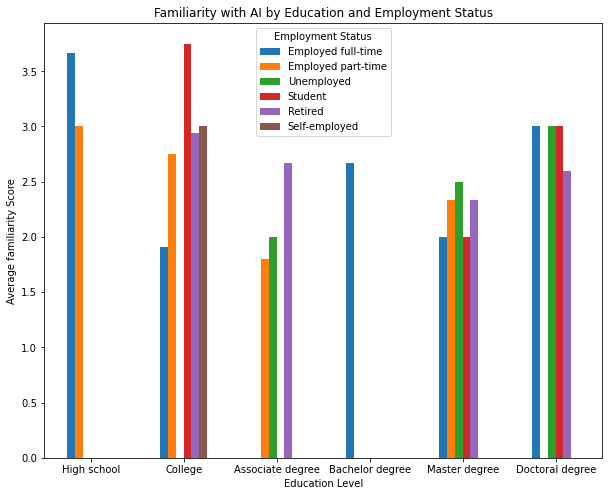

In [31]:
# Demographic analysis - familiarity with AI by education level and emplyment
pivot_table = data.pivot_table(values='Familiarity with AI', index='Education Level', columns='Employment Status', aggfunc='mean')
pivot_table.plot(kind='bar', figsize=(10, 8))
plt.title('Familiarity with AI by Education and Employment Status')
plt.xlabel('Education Level')
plt.ylabel('Average familiarity Score')
plt.legend(title='Employment Status', labels=['Employed full-time', 'Employed part-time', 'Unemployed', 'Student', 'Retired', 'Self-employed'])
plt.xticks([0,1,2,3,4,5], ['High school', 'College', 'Associate degree', 'Bachelor degree', 'Master degree', 'Doctoral degree'], rotation=0)
plt.show()

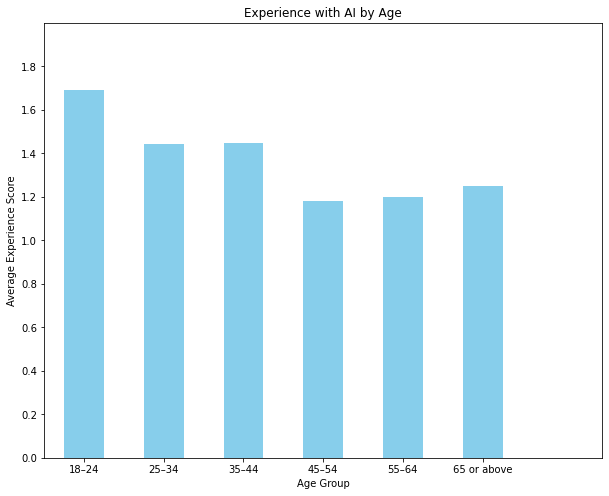

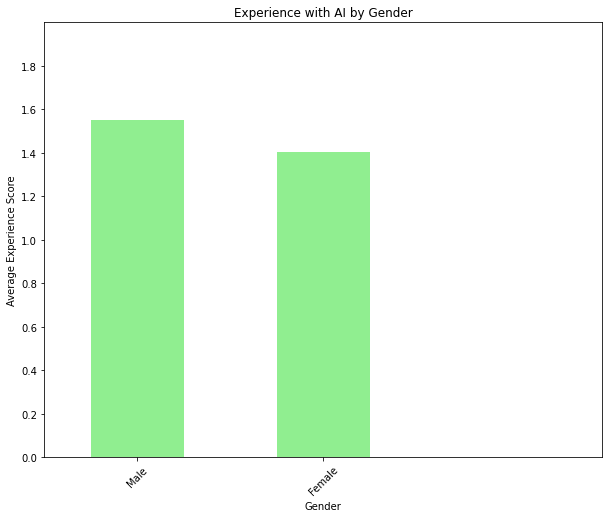

In [32]:
# Load the dataset
file_path = 'Analysis Excel.xlsx'  
data = pd.read_excel(file_path, sheet_name='data') 

# Renaming columns for clarity
columns_to_rename = {
    'C010': 'Experience with AI',
    'F001': 'Age',
    'F002': 'Gender'
}
data.rename(columns=columns_to_rename, inplace=True)

# Converting relevant columns to numeric where necessary
data[['Experience with AI']] = \
    data[['Experience with AI']].apply(pd.to_numeric, errors='coerce')

# Graph 1: Experience with AI by Age
age_group_experience = data.groupby('Age')['Experience with AI'].mean()
age_group_experience.plot(kind='bar', figsize=(10, 8), color='skyblue')
plt.title('Experience with AI by Age')
plt.xlabel('Age Group')
plt.ylabel('Average Experience Score')
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2, 0.2))
plt.xticks([0,1,2,3,4,5], ['18–24','25–34','35–44','45–54','55–64', '65 or above'],rotation=0) 
plt.show()

# Graph 2: Experience with AI by Gender
gender_experience = data.groupby('Gender')['Experience with AI'].mean()
gender_experience.plot(kind='bar', figsize=(10, 8), color='lightgreen')
plt.title('Experience with AI by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Experience Score')
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2, 0.2))
plt.xticks([0,1], ['Male', 'Female'],rotation=45) 
plt.show()

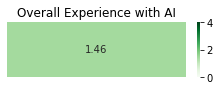

In [34]:
overall_experience = data['Experience with AI'].mean()

# Display the result
#The overall mean experience with AI is 1.46

# Set up the data for the heatmap
heatmap_data = np.array([[1.46]])  # Using the previous overall experience score
max_value = 4  # Setting the maximum value for the color scale

# Create the heatmap
plt.figure(figsize=(4, 1))
ax = sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='Greens', cbar=True, vmin=0, vmax=max_value)
ax.set_title('Overall Experience with AI')
ax.axis('off')  # Hide the axes
plt.show()

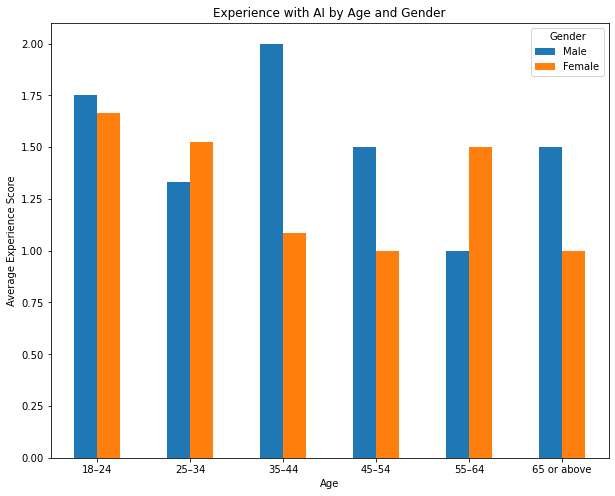

In [35]:
# Demographic analysis - Interaction with AI by Age and Gender
pivot_table = data.pivot_table(values='Experience with AI', index='Age', columns='Gender', aggfunc='mean')
pivot_table.plot(kind='bar', figsize=(10, 8))
plt.title('Experience with AI by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Average Experience Score')
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.xticks([0,1,2,3,4,5], ['18–24','25–34','35–44','45–54','55–64', '65 or above'], rotation=0)
plt.show()

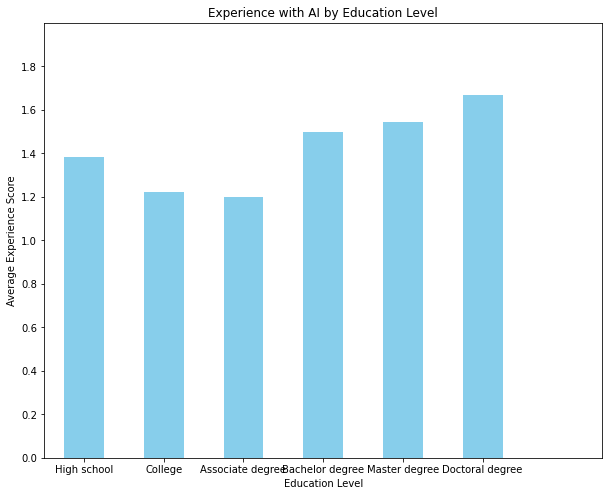

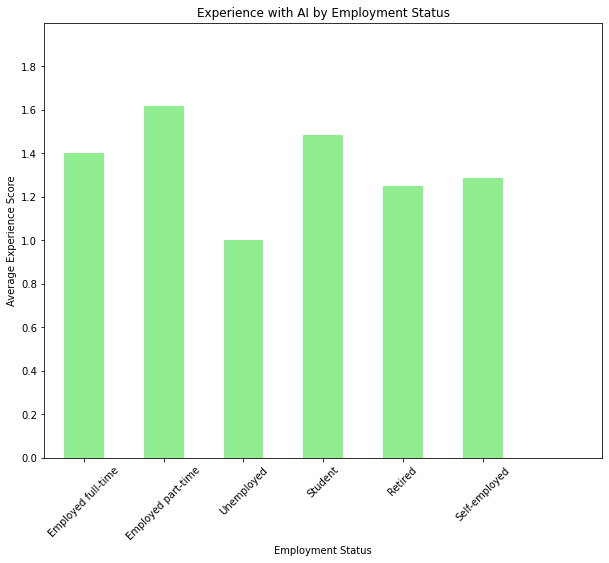

In [36]:
# Load the dataset
file_path = 'Analysis Excel.xlsx'  
data = pd.read_excel(file_path, sheet_name='data') 

# Renaming columns for clarity
columns_to_rename = {
    'C010': 'Experience with AI',
    'F003': 'Education Level',
    'F004': 'Employment Status'
}
data.rename(columns=columns_to_rename, inplace=True)

# Converting relevant columns to numeric where necessary
data[['Experience with AI']] = \
    data[['Experience with AI']].apply(pd.to_numeric, errors='coerce')

# Graph 1: Experience with AI by Education Level
age_group_Experience = data.groupby('Education Level')['Experience with AI'].mean()
age_group_Experience.plot(kind='bar', figsize=(10, 8), color='skyblue')
plt.title('Experience with AI by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Experience Score')
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2, 0.2))
plt.xticks([0,1,2,3,4,5], ['High school', 'College', 'Associate degree', 'Bachelor degree', 'Master degree', 'Doctoral degree'],rotation=0)  
plt.show()

# Graph 2: Experience with AI by Employment Status
gender_Experience = data.groupby('Employment Status')['Experience with AI'].mean()
gender_Experience.plot(kind='bar', figsize=(10, 8), color='lightgreen')
plt.title('Experience with AI by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Experience Score')
plt.ylim(0, 2)
plt.yticks(np.arange(0, 2, 0.2))
plt.xticks([0,1,2,3,4,5], ['Employed full-time', 'Employed part-time', 'Unemployed', 'Student', 'Retired', 'Self-employed'],rotation=45)  
plt.show()

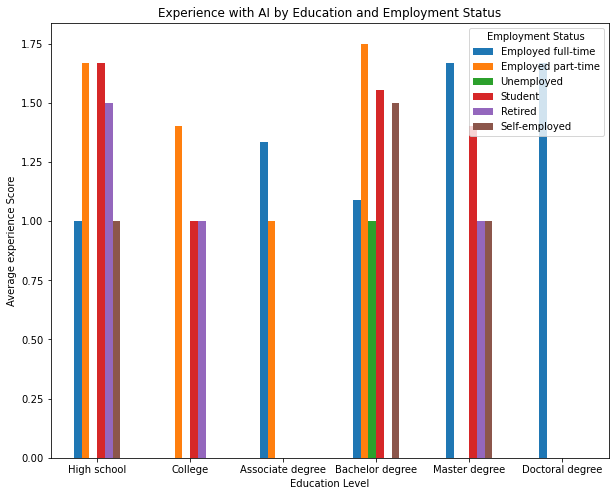

In [37]:
# Demographic analysis - Experience with AI by education level and emplyment
pivot_table = data.pivot_table(values='Experience with AI', index='Education Level', columns='Employment Status', aggfunc='mean')
pivot_table.plot(kind='bar', figsize=(10, 8))
plt.title('Experience with AI by Education and Employment Status')
plt.xlabel('Education Level')
plt.ylabel('Average experience Score')
plt.legend(title='Employment Status', labels=['Employed full-time', 'Employed part-time', 'Unemployed', 'Student', 'Retired', 'Self-employed'])
plt.xticks([0,1,2,3,4,5], ['High school', 'College', 'Associate degree', 'Bachelor degree', 'Master degree', 'Doctoral degree'], rotation=0)
plt.show()

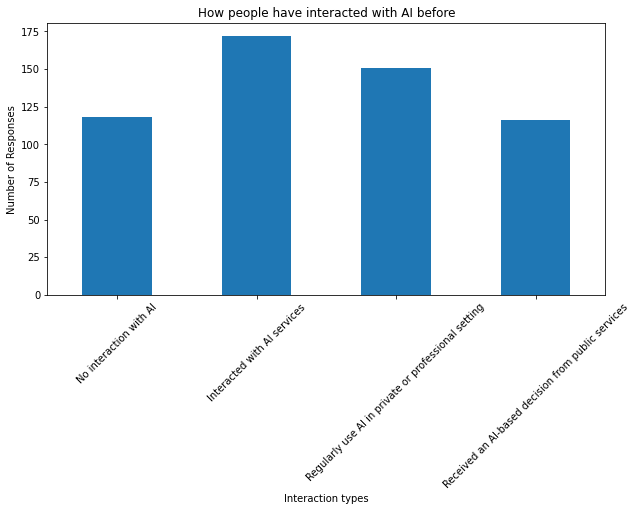

In [38]:
file_path = 'Analysis Excel.xlsx'  
data = pd.read_excel(file_path, sheet_name='data') 


# List of checkbox question columns based on your file image
checkbox_columns = ['C010_01', 'C010_02', 'C010_03', 'C010_04']

# Handle missing data: assuming unchecked boxes are missing and should be considered as 0
data[checkbox_columns] = data[checkbox_columns].fillna(0)

# Check and remove any non-numeric values and ensure all data is in integer format
for column in checkbox_columns:
    # Keeping only numeric rows in each checkbox column
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Fill non-numeric coerced NaNs with 0 and convert to int
    data[column] = data[column].fillna(0).astype(int)

# Descriptive statistics for checkbox answers
checkbox_summary = data[checkbox_columns].sum()

# Visualizing the results
plt.figure(figsize=(10, 5))
checkbox_summary.plot(kind='bar')
plt.title('How people have interacted with AI before')
plt.xlabel('Interaction types')
plt.ylabel('Number of Responses')
plt.xticks([0,1,2,3 ], ['No interaction with AI', 'Interacted with AI services', 'Regularly use AI in private or professional setting', 'Received an AI-based decision from public services'], rotation=45)
plt.show()



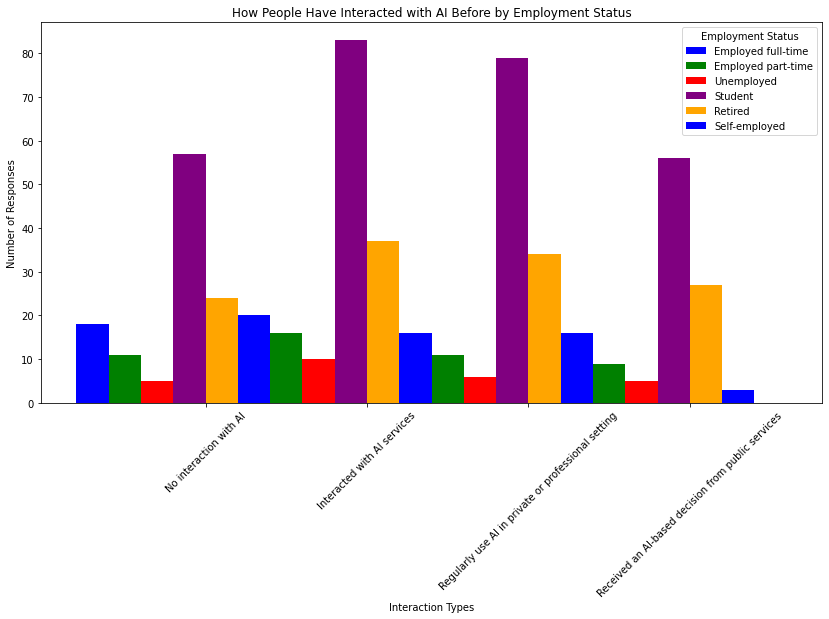

In [39]:
file_path = 'Analysis Excel.xlsx'
data = pd.read_excel(file_path, sheet_name='data')

# List of checkbox question columns and employment status
checkbox_columns = ['C010_01', 'C010_02', 'C010_03', 'C010_04']
employment_column = 'F003' 

# Handle missing data: assuming unchecked boxes are missing and should be considered as 0
data[checkbox_columns] = data[checkbox_columns].fillna(0)

# Check and remove any non-numeric values and ensure all data is in integer format
for column in checkbox_columns:
    # Keeping only numeric rows in each checkbox column
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Fill non-numeric coerced NaNs with 0 and convert to int
    data[column] = data[column].fillna(0).astype(int)

# Group data by employment status and sum up each grou4
grouped_data = data.groupby(employment_column)[checkbox_columns].sum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# List of interaction types for labeling purposes
interaction_labels = ['No interaction with AI', 'Interacted with AI services',
                      'Regularly use AI in private or professional setting',
                      'Received an AI-based decision from public services']

# Colors for different employment statuses
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Plotting each group
for (i, (name, group)) in enumerate(grouped_data.iterrows()):
    ax.bar([x + i*0.2 for x in range(len(group))], group, width=0.2, label=name, color=colors[i % len(colors)])

# Title and labels
ax.set_title('How People Have Interacted with AI Before by Employment Status')
ax.set_xlabel('Interaction Types')
ax.set_ylabel('Number of Responses')
ax.set_xticks([x + 0.2*len(grouped_data)/2 for x in range(len(group))])
ax.set_xticklabels(interaction_labels, rotation=45)
ax.legend(title='Employment Status', labels=['Employed full-time', 'Employed part-time', 'Unemployed', 'Student', 'Retired', 'Self-employed'])

# Show the plot
plt.show()

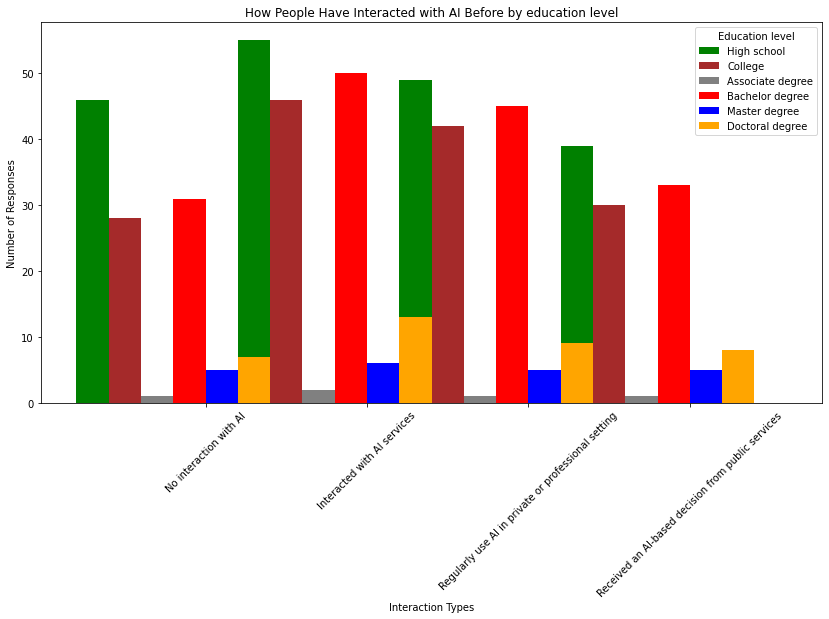

In [40]:
# List of checkbox question columns and education level
checkbox_columns = ['C010_01', 'C010_02', 'C010_03', 'C010_04']
education_column = 'F004'  

# Handle missing data: assuming unchecked boxes are missing and should be considered as 0
data[checkbox_columns] = data[checkbox_columns].fillna(0)

# Check and remove any non-numeric values and ensure all data is in integer format
for column in checkbox_columns:
    # Keeping only numeric rows in each checkbox column
    data[column] = pd.to_numeric(data[column], errors='coerce')
    # Fill non-numeric coerced NaNs with 0 and convert to int
    data[column] = data[column].fillna(0).astype(int)

# Group data by employment status and sum up each group
grouped_data = data.groupby(education_column)[checkbox_columns].sum()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 7))

# List of interaction types for labeling purposes
interaction_labels = ['No interaction with AI', 'Interacted with AI services',
                      'Regularly use AI in private or professional setting',
                      'Received an AI-based decision from public services']

# Colors for different education levels
colors = ['green','brown','gray', 'red', 'blue', 'orange']

# Plotting each group
for (i, (name, group)) in enumerate(grouped_data.iterrows()):
    ax.bar([x + i*0.2 for x in range(len(group))], group, width=0.2, label=name, color=colors[i % len(colors)])

# Title and labels
ax.set_title('How People Have Interacted with AI Before by education level')
ax.set_xlabel('Interaction Types')
ax.set_ylabel('Number of Responses')
ax.set_xticks([x + 0.2*len(grouped_data)/2 for x in range(len(group))])
ax.set_xticklabels(interaction_labels, rotation=45)
ax.legend(title='Education level', labels=['High school', 'College', 'Associate degree', 'Bachelor degree', 'Master degree', 'Doctoral degree'])

# Show the plot
plt.show()

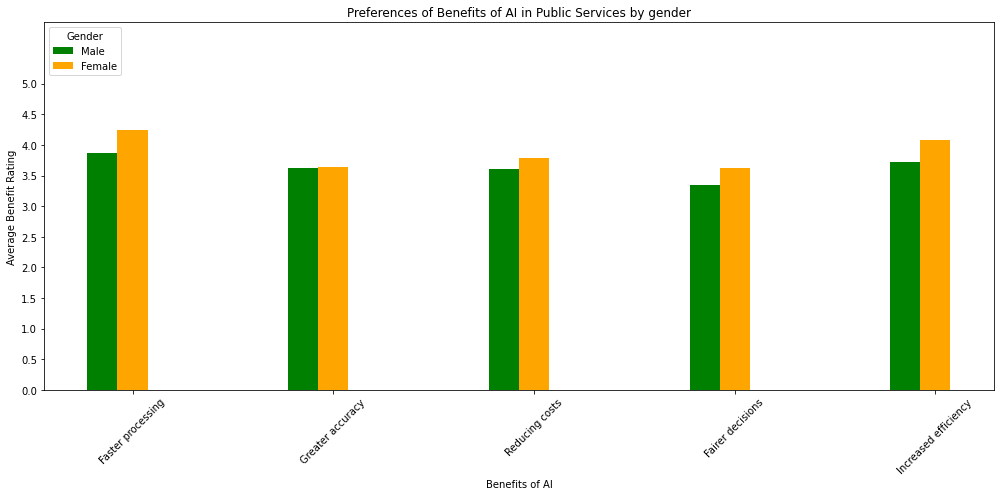

In [46]:
#Reload the dataset
file_path = 'Analysis Excel.xlsx'
data_sheet = pd.read_excel(file_path, sheet_name='data')

# Benefits columns and gender column
benefits_columns = ['C007_01', 'C007_02', 'C007_03', 'C007_04', 'C007_05']
gender_column = 'F002' 

# Label arrays for x-axis
benefits_labels = ['Faster processing', 'Greater accuracy', 'Reducing costs', 'Fairer decisions', 'Increased efficiency']

# Convert benefits columns to numeric, handling errors
data_sheet[benefits_columns] = data_sheet[benefits_columns].apply(pd.to_numeric, errors='coerce')

# Group data by gender and calculate the mean for each group
grouped_data = data_sheet.groupby(gender_column)[benefits_columns].mean().T
grouped_data.index = benefits_labels

# Setting up the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Colors for different ages, extend this list if more categories exist
colors = ['green','orange']

# Generate bars for each benefit category grouped by age
bar_width = 0.15
for i, column in enumerate(grouped_data.columns):
    # Get the x positions for the groups
    x_positions = np.arange(len(grouped_data)) + i * bar_width
    ax.bar(x_positions, grouped_data[column], width=bar_width, label=column, color=colors[i % len(colors)])

# Title and labels
ax.set_title('Preferences of Benefits of AI in Public Services by gender')
ax.set_xlabel('Benefits of AI')
ax.set_ylabel('Average Benefit Rating')

# Setting x-ticks position and labels
ax.set_xticks(np.arange(len(benefits_labels)) + bar_width * len(grouped_data.columns) / 2 - bar_width / 2)
ax.set_xticklabels(benefits_labels)

# Rotating x-tick labels for better visibility
plt.xticks(rotation=45)

# Adding legend
ax.legend(title='Gender', labels=['Male', 'Female'])
# Setting y-axis limits
plt.ylim(0, 6)
plt.yticks(np.arange(0, 5.1, 0.5))

# Display the plot
plt.tight_layout()
plt.show()

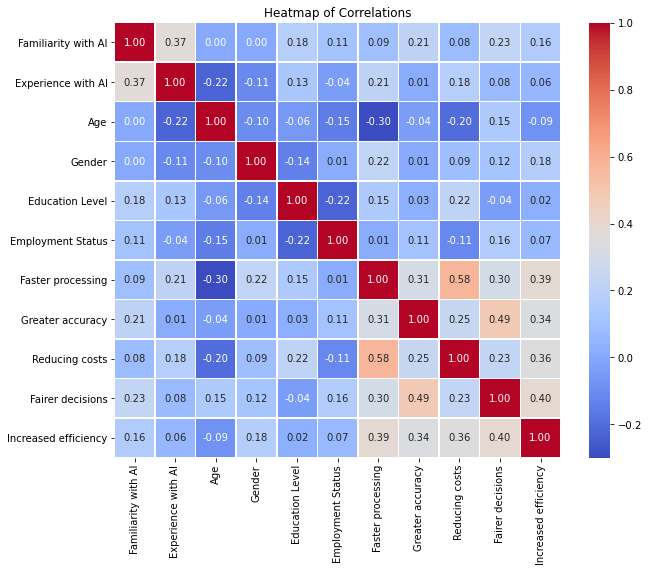

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Analysis Excel.xlsx'
data_df = pd.read_excel(file_path, sheet_name='data')

# Strip column names to remove extra spaces
data_df.columns = data_df.columns.str.strip()


# Rename columns for clarity
data_df = data_df.rename(columns={
    'C001': 'Familiarity with AI',
    'C010': 'Experience with AI',
    'F001': 'Age',
    'F002': 'Gender',
    'F003': 'Education Level',
    'F004': 'Employment Status',
    'C007_01':'Faster processing', 
    'C007_02':'Greater accuracy', 
    'C007_03':'Reducing costs', 
    'C007_04':'Fairer decisions', 
    'C007_05':'Increased efficiency'
  
})

# Define the two sets of columns
columns_set_1 = ['Familiarity with AI', 'Experience with AI', 'Age', 'Gender', 'Education Level', 'Employment Status']
columns_set_2 = ['Faster processing', 'Greater accuracy', 'Reducing costs', 'Fairer decisions', 'Increased efficiency']

# Filter the DataFrame for the relevant columns
relevant_columns = columns_set_1 + columns_set_2
filtered_data = data_df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()


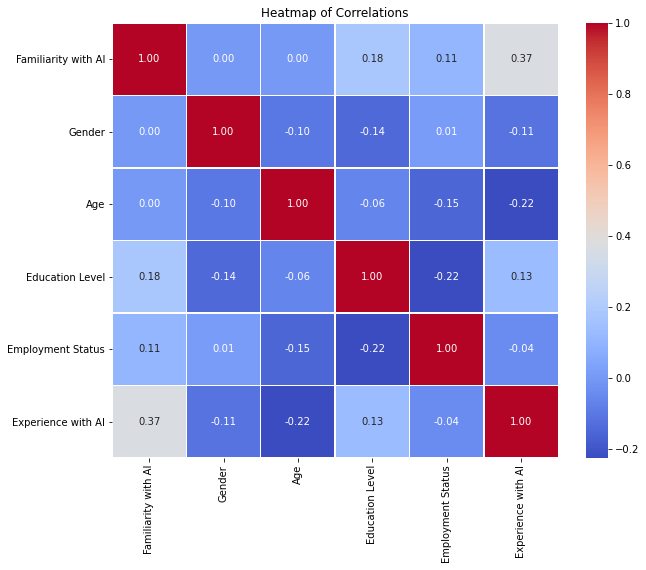

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Analysis Excel.xlsx'
data_df = pd.read_excel(file_path, sheet_name='data')

# Strip column names to remove extra spaces
data_df.columns = data_df.columns.str.strip()


# Rename columns for clarity
data_df = data_df.rename(columns={
    'C001': 'Familiarity with AI',
    'C010': 'Experience with AI',
    'F001': 'Age',
    'F002': 'Gender',
    'F003': 'Education Level',
    'F004': 'Employment Status'
  
})

# Define the two sets of columns
columns_set_1 = ['Familiarity with AI', 'Gender', 'Age']
columns_set_2 = [ 'Education Level', 'Employment Status','Experience with AI']

# Filter the DataFrame for the relevant columns
relevant_columns = columns_set_1 + columns_set_2
filtered_data = data_df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()

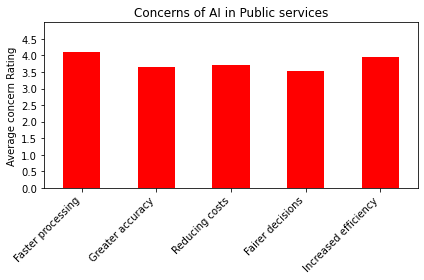

In [49]:
# Reload the dataset
file_path = 'Analysis Excel.xlsx'
data_sheet = pd.read_excel(file_path, sheet_name='data')


# benfits columns
concerns = ['C008_01','C008_02','C008_03','C008_04','C008_05']

concerns_labels = ['Transparency','Data privacy', 'Errors in decision-making', 'Bias' , 'Lack of human oversight']

# Convert columns to numeric
data_sheet[concerns] = data_sheet[concerns].apply(pd.to_numeric, errors='coerce')

# Calculate average ratings for each factor
concerns = data_sheet[concerns].mean()
concerns.index = concerns_labels

# Plot the influence factors
benefits.plot(kind='bar', color='red')
plt.title('Concerns of AI in Public services')
plt.ylabel('Average concern Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.ylim(0, 5)
plt.yticks(np.arange(0, 5, 0.5))
plt.show()

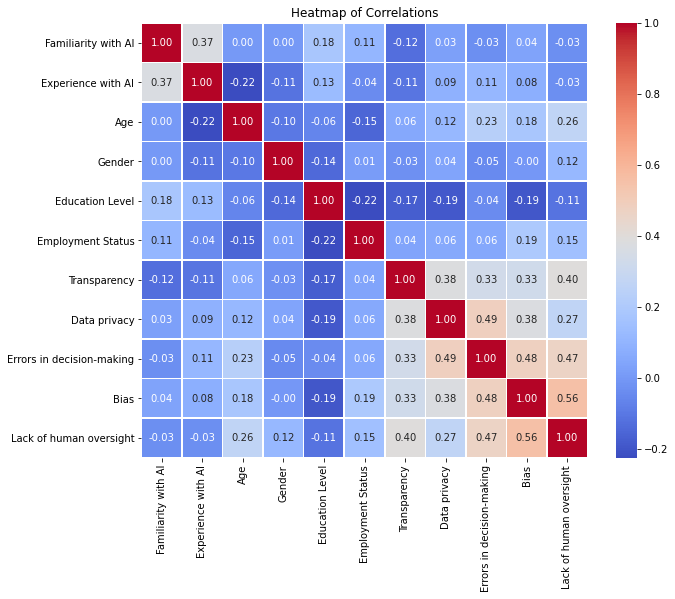

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'Analysis Excel.xlsx'
data_df = pd.read_excel(file_path, sheet_name='data')

# Strip column names to remove extra spaces
data_df.columns = data_df.columns.str.strip()


# Rename columns for clarity
data_df = data_df.rename(columns={
    'C001': 'Familiarity with AI',
    'C010': 'Experience with AI',
    'F001': 'Age',
    'F002': 'Gender',
    'F003': 'Education Level',
    'F004': 'Employment Status',
    'C008_01':'Transparency', 
    'C008_02':'Data privacy', 
    'C008_03':'Errors in decision-making', 
    'C008_04':'Bias', 
    'C008_05':'Lack of human oversight'
  
})

# Define the two sets of columns
columns_set_1 = ['Familiarity with AI', 'Experience with AI', 'Age', 'Gender', 'Education Level', 'Employment Status']
columns_set_2 = ['Transparency', 'Data privacy', 'Errors in decision-making', 'Bias', 'Lack of human oversight']

# Filter the DataFrame for the relevant columns
relevant_columns = columns_set_1 + columns_set_2
filtered_data = data_df[relevant_columns].apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Correlations")
plt.show()